In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from load_utils import *

In [2]:
d = load_diffs()
df_events, df_blocked_user_text = load_block_events_and_users()

### Q: How does tone depend on the frequency of commenting?

Methodology: let the "aggressiveness" of a user be the averge aggression_score of all their comments. Compare aggression scores across groups of users based on how much the post

In [3]:
tresholds = np.percentile(d['2015']['user_text'].value_counts(),  np.arange(0, 100.01,0.5 ))
tresholds = sorted(set(tresholds.astype(int)))

In [4]:
bins = []
for i in range(len(tresholds)-1):
    label = '%d-%d' % (tresholds[i], tresholds[i+1]-1)
    rnge = range(tresholds[i], tresholds[i+1])
    bins.append((label, rnge))

In [5]:
def map_count(x):
    for label, rnge in bins:
        if x in rnge:
            return label
        
        
d_temp = d['2015'].query('not author_anon')\
                 .groupby('user_text')['pred_aggression_score']\
                 .agg( {'aggressiveness': np.mean, 'count': len})\
                 .assign(num_comment_range = lambda x: x['count'].apply(map_count))

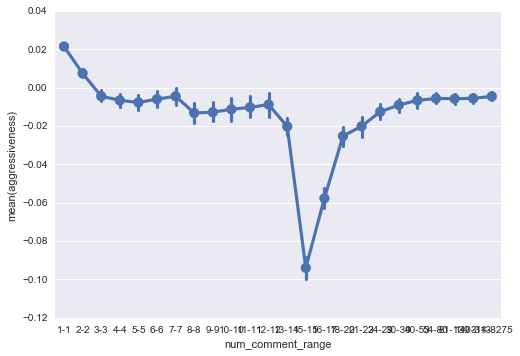

In [6]:
o = [e[0] for e in bins]
sns.pointplot(x='num_comment_range', y= 'aggressiveness', data= d_temp, order = o)